<center><img src="https://javier.rodriguez.org.mx/itesm/2014/tecnologico-de-monterrey-blue.png" width="450" align="center"></center>
<br><p><center><h1><b>Principal Component Analysis (PCA): Swiss Banknotes Dataset</b></h1></center></p> 
<p><center><h3>Course: <i>Application of Multivariate Methods in Data Science (Group 652)</i></h3></center></p>
<p><center><h4>Instructed by: <i>Dr. Hugo E. Ramirez</i></h4></center></p> 

<p style="text-align: right;">Alejandro Santiago Baca Eyssautier - A01656580</p> 
<p style="text-align: right;">October 3rd, 2024</p><br>

<br><p><h4> <b>Introduction</b> </h4></p>

This project analyzes six key variables measured on Swiss 1000-franc banknotes to distinguish between genuine and counterfeit notes. The dataset includes 100 observations from genuine banknotes and 100 observations from counterfeit banknotes, with measurements taken on various aspects of the notes' dimensions. This analysis employs Principal Component Analysis (PCA) to explore the relationships between these variables, reduce the dimensionality of the data, and visualize the variability in the data.

PCA is a commonly used method for dimensionality reduction in multivariate statistics. It involves transforming the data into a new set of variables, the principal components, which are uncorrelated and capture the majority of the variance in the data. The steps below outline a comprehensive PCA analysis, based on the given banknote data, while focusing on several core concepts such as variance, covariance, and eigenvalue decomposition.

The six measured variables from the banknote dataset are:

1. **X1**: Length of the banknote
2. **X2**: Height of the banknote (left side)
3. **X3**: Height of the banknote (right side)
4. **X4**: Distance of the inner frame to the lower border
5. **X5**: Distance of the inner frame to the upper border
6. **X6**: Length of the diagonal


<br><p><h4> <b>Section 1: PCA Methodology</b> </h4></p>

**(a) Calculation of the Mean and Variance**

To begin the PCA process, we calculate the mean vector and variance for each of the six variables in the dataset. This step ensures that we understand the basic distribution of each feature before transforming the data.

In [75]:
# Import necessary libraries
import numpy as np
import pandas as pd

# Load the data from the CSV file
data = pd.read_csv('Banknotes.csv')
X = data.values  # Store the values of the dataset

# Centering matrix
n = X.shape[0]
one_n = np.ones((n, 1))
H = np.eye(n) - 1/n * one_n @ one_n.T

# Calculate the mean vector (μ)
x_bar = 1/n * one_n.T @ X 

# Calculate the covariance matrix
S = 1/n * X.T @ H @ X

# Display the mean vector and covariance matrix
print(f'Mean vector (x̄):\n', x_bar)
print(f'\nCovariance matrix (S):\n', S)

Mean vector (x̄):
 [[214.896  130.1215 129.9565   9.4175  10.6505 140.4835]]

Covariance matrix (S):
 [[ 0.141084    0.031286    0.022976   -0.10273    -0.018448    0.083884  ]
 [ 0.031286    0.12968775  0.10788525  0.21472375  0.10451425 -0.20829525]
 [ 0.022976    0.10788525  0.16245775  0.28271125  0.12934675 -0.23926775]
 [-0.10273     0.21472375  0.28271125  2.07644375  0.16371625 -1.03181125]
 [-0.018448    0.10451425  0.12934675  0.16371625  0.64149975 -0.54686675]
 [ 0.083884   -0.20829525 -0.23926775 -1.03181125 -0.54686675  1.32107775]]


<br>

**Explanation**:

- *NumPy* is a fundamental package for scientific computing in Python, used here for matrix operations.
- *Pandas* is a data manipulation library, used here to load the dataset from a CSV file.
- The *mean vector (x̄)* is computed to center the data around zero.
- The *covariance matrix (S)* represents the relationship between the variables, which will help us determine the principal components.

**Interpretation**:

- The mean vector represents the average of each variable, which helps us understand the central tendency of the data.
- The covariance matrix shows how the variables relate to each other. Positive values indicate that variables tend to increase together, while negative values indicate inverse relationships.

<br>

**(b) Eigenvalue and Eigenvector Calculation**

In this step, we perform eigenvalue decomposition of the covariance matrix to extract the eigenvalues and eigenvectors. These eigenvectors represent the directions of the principal components, while the eigenvalues represent the variance explained by each principal component.

In [76]:
# Compute the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(S)

# Display the eigenvalues and eigenvectors
print('Eigenvalues:\n', np.diag(eigenvalues))
print('\nEigenvectors:\n', eigenvectors)
print('\nVerification of S = ΓΛΓ^T:\n', eigenvectors @ np.diag(eigenvalues) @ eigenvectors.T)

Eigenvalues:
 [[2.98530335 0.         0.         0.         0.         0.        ]
 [0.         0.93094242 0.         0.         0.         0.        ]
 [0.         0.         0.24219664 0.         0.         0.        ]
 [0.         0.         0.         0.19368545 0.         0.        ]
 [0.         0.         0.         0.         0.08478579 0.        ]
 [0.         0.         0.         0.         0.         0.0353371 ]]

Eigenvectors:
 [[-0.04377427 -0.01070966 -0.3263165  -0.56169177  0.75257278  0.09809807]
 [ 0.11216159 -0.07144697 -0.25896137 -0.45545879 -0.34680082 -0.76651197]
 [ 0.13919062 -0.06628208 -0.34473274 -0.41532963 -0.53465173  0.63169678]
 [ 0.76830499  0.56307225 -0.2180222   0.18610822  0.09996771 -0.02221711]
 [ 0.2017661  -0.65928988 -0.55668568  0.45069851  0.10190229 -0.03485874]
 [-0.57890193  0.48854255 -0.59176285  0.25844832 -0.08445895 -0.04567946]]

Verification of S = ΓΛΓ^T:
 [[ 0.141084    0.031286    0.022976   -0.10273    -0.018448    0.083884  ]


<br>

**Explanation**:

- Eigenvalue decomposition is performed using *np.linalg.eig()*. This function returns the *eigenvalues (Λ)* and *eigenvectors (Γ)* of the covariance matrix.
- The eigenvectors represent the principal components (directions of maximum variance), and the eigenvalues represent the variance captured by each principal component.

**Interpretation**:

- The *eigenvalues* provide a measure of how much variance each principal component captures.
- The *eigenvectors* represent the directions along which the variance of the data is maximized. In PCA, the first few principal components capture the most significant variance in the data.

<br>

**(c) Principal Component Scores Calculation and Scatter Plots**

Next, we project the centered data onto the eigenvectors to compute the **principal component scores**. These scores represent the transformed data in the new PCA space. The transformed data has important properties when the following conditions are met:

- **If** $ Y = \text{eigenvector matrix transpose} \times (X - \bar{X}) $ **and** $ X $ is distributed multinormally, where the covariance matrix is:

$$\text{Cov}(X) = \text{eigenvectors} \times \text{eigenvalues} \times \text{eigenvectors}^T$$

then the following properties hold:

1. $Y$ is distributed multinormally with **mean 0** and **covariance matrix = eigenvalues**.
2. The **variance** of $Y$ is the diagonal of the covariance matrix of $Y$, which corresponds to the **eigenvalues**.
3. The **product of the variances** is equal to the determinant of the covariance matrix of $Y$, which is also the product of the **eigenvalues**.

We then create scatter plots to visualize the relationships between different principal components while distinguishing between genuine and counterfeit banknotes.

In [77]:
# Y = (X - 1_n x_bar) @ eigenvector matrix of S
Y = (X - one_n @ x_bar) @ eigenvectors # Shapes are ((200, 6) - (200, 1) @ (1, 6)) @ (6, 6) = (200, 6) @ (6, 6) = (200, 6)

# S_y = 1/n * Y.T @ H @ Y is the covariance matrix of Y
S_y = 1/n * Y.T @ H @ Y

# 1. Y is distributed multinormally with E[y] = 0, covariance = 0 and variance = eigenvalues
print('Mean of Y:', list(map(lambda x: abs(round(x, 13)), np.mean(Y, axis=0))))
print('\nVariance of Y:', np.var(Y, axis=0))

# 2. The variance of Y is the diagonal of the covariance matrix of Y, that is, the eigenvalues.
print('\nCovariance matrix of Y:\n', np.round(S_y, 5))
print('\nEigenvalues:\n', np.round(np.diag(eigenvalues), 5))

# 3. The product of the variances is equal to the determinant of the covariance matrix of Y, that is, the product of the eigenvalues.
print('\nProduct of the variances:', round(np.prod(np.var(Y, axis=0)), 5))
print('\nDeterminant of the covariance matrix of Y:', round(np.linalg.det(S_y), 5))

Mean of Y: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

Variance of Y: [2.98530335 0.93094242 0.24219664 0.19368545 0.08478579 0.0353371 ]

Covariance matrix of Y:
 [[ 2.9853   0.      -0.      -0.       0.       0.     ]
 [ 0.       0.93094  0.       0.      -0.       0.     ]
 [-0.       0.       0.2422  -0.      -0.       0.     ]
 [-0.       0.      -0.       0.19369 -0.       0.     ]
 [ 0.      -0.      -0.      -0.       0.08479 -0.     ]
 [ 0.       0.       0.       0.      -0.       0.03534]]

Eigenvalues:
 [[2.9853  0.      0.      0.      0.      0.     ]
 [0.      0.93094 0.      0.      0.      0.     ]
 [0.      0.      0.2422  0.      0.      0.     ]
 [0.      0.      0.      0.19369 0.      0.     ]
 [0.      0.      0.      0.      0.08479 0.     ]
 [0.      0.      0.      0.      0.      0.03534]]

Product of the variances: 0.00039

Determinant of the covariance matrix of Y: 0.00039


<br>

**Explanation**:

- *Matrix Projection*: The data is projected onto the eigenvectors to calculate the principal component scores.
- The covariance matrix of the projected data is calculated to show that the variance of the transformed data matches the eigenvalues of the original covariance matrix.

**Interpretation**:

- The mean of the projected data 𝑌 is zero, as expected for PCA.
- The variances along each principal component correspond to the eigenvalues, which confirms that the principal components capture the variance described by the eigenvalues.
- The product of the variances is equal to the determinant of the covariance matrix, confirming that the transformation preserves the total variance in the data.

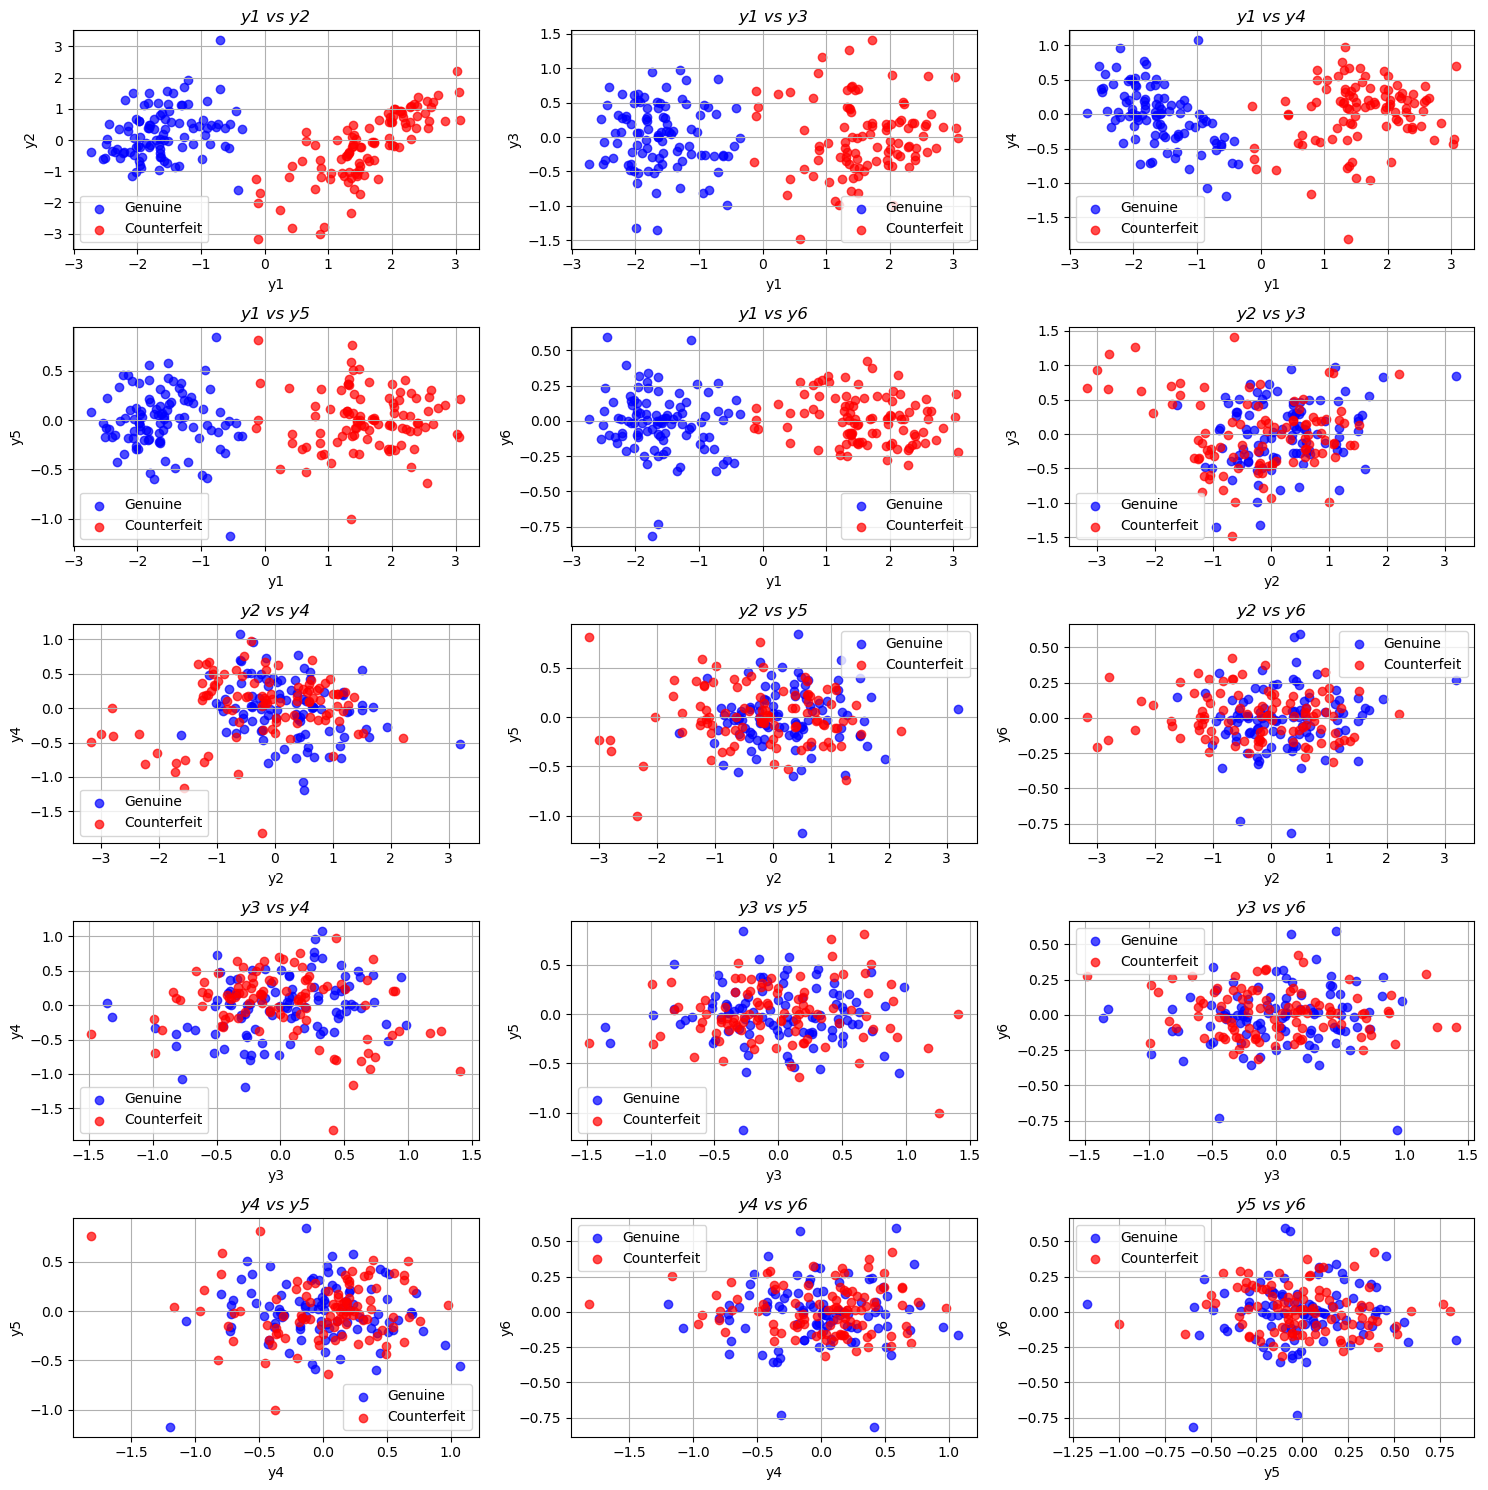

In [78]:
import matplotlib.pyplot as plt
from itertools import combinations

def plot_scatters(Y):
    # Generate all 15 combinations of 6 variables taken 2 at a time
    combs = list(combinations(range(6), 2))
    fig, axs = plt.subplots(5, 3, figsize=(15, 15))

    # Flatten axs to make indexing easier
    axs = axs.ravel()

    # Loop over the combinations and plot
    for k, (i, j) in enumerate(combs):
        # Plot first 100 samples (Real money) in one color, and the next 100 (Fake money) in another
        axs[k].scatter(Y[:100, i], Y[:100, j], color='blue', label='Genuine', alpha=0.7)
        axs[k].scatter(Y[100:, i], Y[100:, j], color='red', label='Counterfeit', alpha=0.7)
        
        # Set labels and titles
        axs[k].set_title(f'y{i+1} vs y{j+1}', fontstyle='italic')
        axs[k].set_xlabel(f'y{i+1}')
        axs[k].set_ylabel(f'y{j+1}')
        axs[k].grid()
        
        # Ensure the legend is only shown once per plot
        axs[k].legend()

    # Adjust layout
    plt.tight_layout()
    plt.show()
  
# Plot the scatter plots  
plot_scatters(Y)

<br>

**Explanation**:

- *Matplotlib* is a widely used Python library for generating plots and visualizations. Here, we use it to create scatter plots comparing the transformed principal components.
  
- We use `itertools.combinations` to generate *all pairwise combinations* of the six principal components, *without repetition*. This ensures that combinations such as $(1, 2)$ are included, but $(2, 1)$ (which would be redundant) is excluded. Furthermore, combinations such as $(1, 1)$ or $(2, 2)$ are also excluded, as we are only interested in comparing different principal components. The output of `combinations(range(6), 2)` gives the following pairs:

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5),  
 (1, 2), (1, 3), (1, 4), (1, 5),  
 (2, 3), (2, 4), (2, 5),  
 (3, 4), (3, 5),  
 (4, 5)]  
 

These pairs are then used as indices to plot the different principal components against each other.

<br>

**Interpretation**:

- The scatter plots illustrate the separation between genuine and counterfeit banknotes across the principal components. These visualizations help us identify how well the PCA transformation separates the two classes.
  
- *All scatter plots involving $y1$* (the first principal component) show more *distinct separation* between genuine and counterfeit banknotes compared to those that do not include $y1$. This suggests that the first principal component captures the most variance and is the most significant factor in distinguishing between the two types of banknotes.

For instance, combinations like *y1 vs y2* clearly show a better separation than, for example, *y2 vs y3*, where the data points overlap more, indicating that these two principal components contain enough information to differentiate the real and fake banknotes. This observation aligns with the fact that the first principal component $y1$ captures the majority of the variance in the dataset, making it the most effective dimension for distinguishing the two classes.

This could involve, for example, variations in measurements like length or height, where counterfeit banknotes tend to deviate more consistently from the genuine ones. 

<br>

**(d) Cumulative Variance Explained and Dimensionality Reduction**

In this step, we calculate the cumulative variance explained by each principal component and determine how many components are necessary to retain 80% of the total variance in the data. We then reduce the dimensionality by selecting only the eigenvectors corresponding to the top principal components.

- **Cumulative Variance**: We calculate the cumulative sum of the eigenvalues divided by the total sum of eigenvalues. This gives us the proportion of variance explained by each principal component, and by summing them, we can see how much variance is explained cumulatively as we add more components.
- **Dimensionality Reduction**: To reduce the dimensionality of the data, we select the eigenvectors associated with the highest eigenvalues that together explain at least 80% of the total variance.


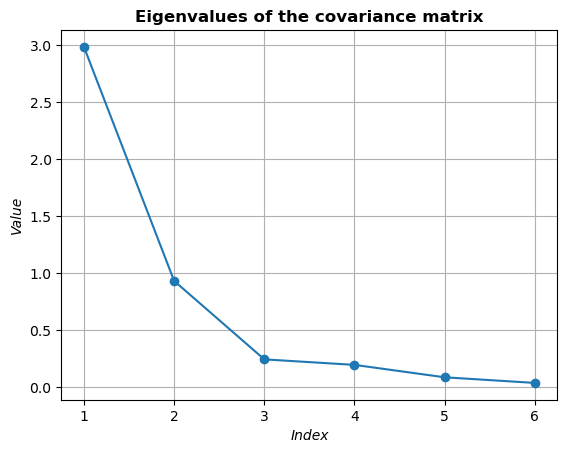


Cumulative sum of the eigenvalues: [0.66751699 0.8756767  0.92983212 0.97314039 0.99209859 1.        ]

Number of eigenvectors selected: 2

Eigenvalues selected:
 [2.98530335 0.93094242]

Eigenvectors selected:
 [[-0.04377427 -0.01070966]
 [ 0.11216159 -0.07144697]
 [ 0.13919062 -0.06628208]
 [ 0.76830499  0.56307225]
 [ 0.2017661  -0.65928988]
 [-0.57890193  0.48854255]]


In [79]:
# Plot eigenvalues
plt.plot(range(1,7), eigenvalues, marker='o')
plt.title('Eigenvalues of the covariance matrix', fontweight='bold')
plt.xlabel('Index', fontstyle='italic')
plt.ylabel('Value', fontstyle='italic')
plt.grid()
plt.show()

# Calculate the cumulative sum of the eigenvalues
cumulative_sum = np.cumsum(eigenvalues)
cumulative_sum /= cumulative_sum[-1]  # Normalize to get the cumulative proportion of explained variance

# Print the cumulative sum of eigenvalues
print('\nCumulative sum of the eigenvalues:', cumulative_sum)

# Select the number of components needed to explain 80% of the variance
k = np.argmax(cumulative_sum >= 0.8) + 1
print('\nNumber of eigenvectors selected:', k)

# Select the top eigenvalues and corresponding eigenvectors
eigenvalues_selected, eigenvectors_selected = eigenvalues[:k], eigenvectors[:, :k]

# Display the selected eigenvalues and eigenvectors
print('\nEigenvalues selected:\n', eigenvalues_selected)
print('\nEigenvectors selected:\n', eigenvectors_selected)

<br>

**Explanation**:

- *Matplotlib Plot*: We plot the *eigenvalues* of the covariance matrix. The x-axis represents the index of each principal component, and the y-axis represents the amount of variance captured by each component. This plot helps visualize how much variance is explained by each component individually.
- *Cumulative Sum*: The cumulative sum of the eigenvalues represents the proportion of the total variance explained as we move through the components.
- *Dimensionality Reduction*: We use the cumulative sum to select the minimum number of principal components that together explain *80%* of the variance. In this case, two components are selected, as they explain more than 80% of the variance.

**Interpretation**:

- Based on the cumulative sum, we would choose the first two principal components because they together explain over 80% of the total variance (67% from the first component and 20% from the second). Selecting these two components achieves an optimal balance between dimensionality reduction and variance preservation. Further components contribute significantly less, so they are not necessary for explaining most of the data's variance.
- This dimensionality reduction simplifies the dataset while retaining most of the variability, which is crucial for visualizing and further analysis.

<br>

**(e): Algebraic Proof of Covariance and Correlation in PCA Sheme**

Demonstrate that for the PCA scheme $\text{cov}(X, Y) = \Gamma \Lambda$ and the correlation between $X_i$ and $Y_j$ is given by**:

$$\rho_{X_i Y_j} = \gamma_{ij} \left( \frac{\lambda_i}{\sigma_{ii}} \right)^{1/2}$$

Where $\rho_{X_i Y_j}^2$ represents the proportion of the variance of $X_i$ explained by $Y_j$.

<br>

1. Proving that $\text{cov}(X, Y) = \Gamma \Lambda$
    - We define the principal component transformation as:
      $$Y = \Gamma^{-1} (X - \mathbb{E}[X])$$
      Since $\Gamma$ is an orthogonal matrix, $\Gamma^{-1} = \Gamma^T$. Therefore:
      $$Y = \Gamma^{T} (X - \mathbb{E}[X])$$
      Where $\Gamma^T$ projects the centered $X$ onto the principal component axes (the eigenvectors of the covariance matrix of $X$).

    - Using the definition of covariance:
      $$\text{cov}(X, Y) = \mathbb{E}\left[(X - \mathbb{E}[X])(Y - \mathbb{E}[Y])^T\right]$$

      Since $Y = \Gamma^T (X - \mathbb{E}[X])$ and $\mathbb{E}[Y] = 0$, the covariance simplifies to:
    
      $$\text{cov}(X, Y) = \mathbb{E}\left[(X - \mathbb{E}[X]) Y^T\right]$$

    - Since $Y^T = (X - \mathbb{E}[X])^T \Gamma$, we can substitute this expression:
      $$\text{cov}(X, Y) = \mathbb{E}\left[(X - \mathbb{E}[X]) (X - \mathbb{E}[X])^T \Gamma \right]$$
      This simplifies to:
      
      $$\text{cov}(X, Y) = \mathbb{E}\left[(X - \mathbb{E}[X]) (X - \mathbb{E}[X])^T \right] \Gamma$$

    - We know that the covariance of $X$, denoted $\Sigma_X$, is given by:
      $$\Sigma_X = \mathbb{E}\left[(X - \mathbb{E}[X]) (X - \mathbb{E}[X])^T\right]$$
      Substituting this into the expression for $\text{cov}(X, Y)$, we get:
      $$\text{cov}(X, Y) = \Sigma_X \Gamma$$

    - Since every quadratic form can be diagonalized, $\Sigma_X = \Gamma \Lambda \Gamma^T$, where $\Gamma$ is the matrix of eigenvectors and $\Lambda$ is the diagonal matrix of eigenvalues. Substituting this in:
      $$\text{cov}(X, Y) = \Gamma \Lambda \Gamma^T \Gamma$$
      Since $\Gamma^T \Gamma = I $ (the identity matrix), this simplifies to:
      $$\text{cov}(X, Y) = \Gamma \Lambda$$
      This proves that $\text{cov}(X, Y) = \Gamma \Lambda$.

<br>

2. Proving the Correlation Formula
    - The general formula for correlation between two random variables $X$ and $Y$ is given by:
      $$\rho_{X_i Y_j} = \frac{\text{cov}(X_i, Y_j)}{\sqrt{\text{var}(X_i) \cdot \text{var}(Y_j)}}$$ 
      where:

      - $\text{cov}(X_i, Y_j)$ is the covariance between $X_i$ and $Y_j$,
      - $\text{var}(X_i)$ is the variance of $X_i$,
      - $\text{var}(Y_j)$ is the variance of $Y_j$.

    - Using the result from the earlier proof, we know that the covariance between $X_i$ and $Y_j$ is given by:
      $$\text{cov}(X_i, Y_j) = \gamma_{ij} \lambda_j$$
      where:
      - $\gamma_{ij}$ is the $(i,j)$-th entry of the eigenvector matrix $\Gamma$,
      - $\lambda_j$ is the $j$-th eigenvalue associated with the principal component $Y_j$.

      Additionally, we know that:
      - $\text{var}(X_i) = \sigma_{ii}$, which is the variance of the original variable $X_i$,
      - $\text{var}(Y_j) = \lambda_j$, the variance of the principal component $Y_j$, because the variance of $Y_j$ is equal to the eigenvalue $\lambda_j$.

    - Substituting these values into the correlation formula, we get:
      $$\rho_{X_i Y_j} = \frac{\gamma_{ij} \lambda_j}{\sqrt{\sigma_{ii} \cdot \lambda_j}}$$

      The term $\lambda_j$ cancels out in the numerator and denominator, simplifying the expression to:
      $$\rho_{X_i Y_j} = \frac{\gamma_{ij} \lambda_j}{\sqrt{\sigma_{ii}}\cdot \sqrt{\lambda_j}}$$
      $$\rho_{X_i Y_j} = \frac{\gamma_{ij} \cdot \sqrt{\lambda_j}}{\sqrt{\sigma_{ii}}}$$
      $$\rho_{X_i Y_j} = \gamma_{ij} \cdot \frac{\sqrt{\lambda_j}}{\sqrt{\sigma_{ii}}}$$
      $$\rho_{X_i Y_j} = \gamma_{ij} \left( \frac{\lambda_j}{\sigma_{ii}} \right)^{1/2}$$

    This proves that the correlation between $X_i$ and $Y_j$ depends on the eigenvector element $\gamma_{ij}$, the eigenvalue $\lambda_j$, and the variance of $X_i$ ($\sigma_{ii}$).

<br>

**Interpretation**:

- *Covariance Matrix*: We have demonstrated that the covariance matrix between the original variables $X$ and the principal components $Y$ follows the structure $\Gamma \Lambda$, showing that the eigenvectors and eigenvalues dictate how the variance of the original dataset is captured and transformed.
  
- *Correlation Between $X_i$ and $Y_j$*: The derived correlation formula shows that the correlation between an original variable $X_i$ and a principal component $Y_j$ is proportional to the eigenvalue $\lambda_j$, weighted by the corresponding eigenvector element $\gamma_{ij}$, and adjusted by the variance of $X_i$ ($\sigma_{ii}$).

- *Interpretation for Banknote Dataset*: In the context of the banknote dataset, this correlation can be interpreted as the extent to which each original measurement (e.g., length, height) is explained by the transformed principal components. A higher correlation means that a particular feature is well explained by the corresponding principal component, which might help in distinguishing genuine from counterfeit banknotes.

<br><br>

**(f) Correlation and Unit Circle Plot**

In this final part of Exercise 1, we will:

1. **Calculate the correlations** $r_{X_i Y_j}$ between each original variable $X_i$ and the first three principal components $Y_1, Y_2, Y_3$, using the formula derived in the previous section.
2. **Visualize these correlations** in a 2D plot where we compare $r_{X_i Y_1}, r_{X_i Y_2}, r_{X_i Y_3}$ for each variable $X_i$, within a unit circle. 

The goal is to observe how well the first three principal components capture the variance of the original variables.

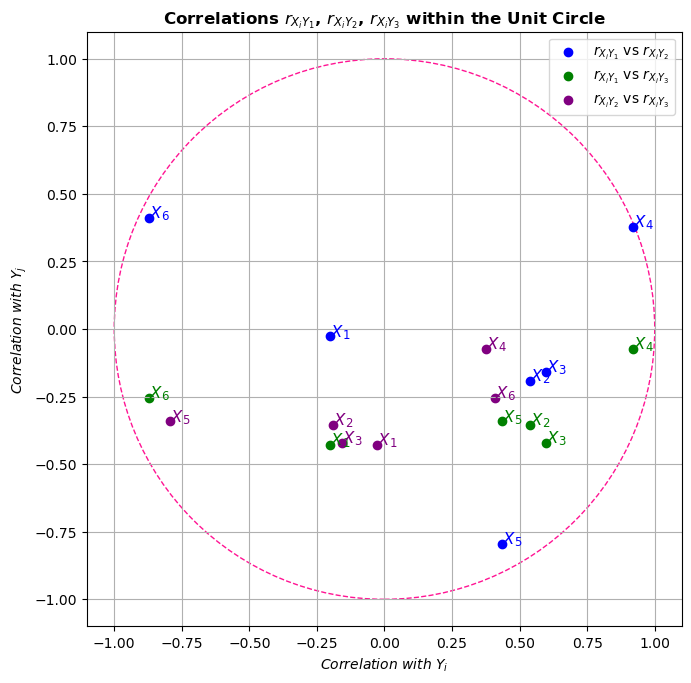

In [80]:
def plot_correlations(eigenvectors, eigenvalues, S):
    # Variances of X (σii)
    variances_X = np.diag(S)

    # Calculate correlations for Y1, Y2, Y3
    correlations = [eigenvectors[:, j] * np.sqrt(eigenvalues[j] / variances_X) for j in range(3)]

    # Plot the correlations within the unit circle
    fig, ax = plt.subplots(figsize=(7, 7))
    circle = plt.Circle((0, 0), 1, color='deeppink', fill=False, linestyle='--')
    ax.add_artist(circle)

    # Scatter plot for correlations between Y1, Y2, and Y3
    ax.scatter(correlations[0], correlations[1], color='blue', label=r'$r_{X_iY_1}$ vs $r_{X_iY_2}$')
    ax.scatter(correlations[0], correlations[2], color='green', label=r'$r_{X_iY_1}$ vs $r_{X_iY_3}$')
    ax.scatter(correlations[1], correlations[2], color='purple', label=r'$r_{X_iY_2}$ vs $r_{X_iY_3}$')

    # Add labels to the points in LaTeX format
    for i in range(6):
        ax.text(correlations[0][i], correlations[1][i], f'$X_{{{i+1}}}$', fontsize=12, color='blue')
        ax.text(correlations[0][i], correlations[2][i], f'$X_{{{i+1}}}$', fontsize=12, color='green')
        ax.text(correlations[1][i], correlations[2][i], f'$X_{{{i+1}}}$', fontsize=12, color='purple')

    # Set plot limits and labels
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlabel(r'Correlation with $Y_i$', fontstyle='italic')
    ax.set_ylabel(r'Correlation with $Y_j$', fontstyle='italic')
    ax.set_aspect('equal', 'box')
    ax.grid(True)
    plt.title(r'Correlations $r_{X_iY_1}$, $r_{X_iY_2}$, $r_{X_iY_3}$ within the Unit Circle', fontweight='bold')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
# Plot the correlations
plot_correlations(eigenvectors, eigenvalues, S)

<br>

**Explanation**

- *Matplotlib* is used to visualize the correlation values. We plot the correlations within the unit circle to see how well the first three principal components explain the variance of the original variables.
- *Unit Circle*: The unit circle is plotted using `plt.Circle()`, and we add it to the plot to ensure all correlations lie within a range of -1 to 1, as expected.
- *Correlations*: We calculate the correlations for the first three principal components $Y_1, Y_2, Y_3$ for each original variable $X_i$ using the eigenvector matrix and the eigenvalues.
- *Scatter Plot*: We scatter the correlation values for easy comparison between the correlations with $Y_1, Y_2, Y_3$, labeling each point by the corresponding original variable $X_i$.

**Interpretation**

- The variables $X_4$ (Distance of inner frame to the lower border) and $X_6$ (Length of the diagonal) have the highest correlations with $Y_1$, indicating that these features explain the majority of the variance captured by the first principal component. This aligns with the earlier finding that $Y_1$ plays a crucial role in distinguishing real from counterfeit banknotes.
  
- Variables like $X_3$ (Height of the banknote, right side) and $X_5$ (Distance of inner frame to the upper border) show moderate correlations with $Y_2$ and $Y_3$, meaning these variables contribute to the variance captured by the second and third components. However, they are less influential than the distance of inner frame to the lower border or the length of the diagonal (i.e. $X_4$ and $X_6$).

- The plot clearly shows that $X_1$ (length of the banknote) has relatively weak correlations with all three principal components, since it appears at the center of the circle. This indicates that the length of the banknote may not be as significant in distinguishing between genuine and counterfeit banknotes compared to other features like the diagonal length or the frame distances.

- The scatter plot highlights the significance of each variable in explaining the variance of the data. Variables close to the edge of the unit circle, especially in relation to $Y_1$, are more impactful in explaining the structure of the banknotes, while those closer to the origin contribute less to the principal components.

This interpretation highlights how PCA has reduced the dimensionality of the dataset while preserving the most relevant information for distinguishing genuine from counterfeit Swiss banknotes. It reinforces the observation that the first principal component $Y_1$ captures the most important variations in the banknotes, making it a key factor in distinguishing banknotes.

<br><p><h4> <b>Section 2: PCA Methodology, Converting Features to Centimeters</b> </h4></p>

**(a) Calculation of the Mean and Variance**

In [81]:
# Convert X1, X2, X3, and X6 to centimeters by dividing by 10
X[:, [0, 1, 2, 5]] = X[:, [0, 1, 2, 5]] / 10

# Calculate the mean vector (μ)
x_bar = 1/n * one_n.T @ X 

# Calculate the covariance matrix
S = 1/n * X.T @ H @ X

# Prevent scientific notation
np.set_printoptions(suppress=True)

# Display the mean vector and covariance matrix
print(f'Mean vector (x̄):\n', x_bar)
print(f'\nCovariance matrix (S):\n', S)

Mean vector (x̄):
 [[21.4896  13.01215 12.99565  9.4175  10.6505  14.04835]]

Covariance matrix (S):
 [[ 0.00141084  0.00031286  0.00022976 -0.010273   -0.0018448   0.00083884]
 [ 0.00031286  0.00129688  0.00107885  0.02147238  0.01045143 -0.00208295]
 [ 0.00022976  0.00107885  0.00162458  0.02827113  0.01293468 -0.00239268]
 [-0.010273    0.02147238  0.02827113  2.07644375  0.16371625 -0.10318112]
 [-0.0018448   0.01045142  0.01293467  0.16371625  0.64149975 -0.05468668]
 [ 0.00083884 -0.00208295 -0.00239268 -0.10318113 -0.05468668  0.01321078]]


<br>

**Interpretation of Changes**:

- When converting measurements to centimeters, the features $X_1, X_2, X_3,$ and $X_6$ (those in millimeters) showed a significant mean reduction in magnitude (i.e., divided by 10). However, features mean like $X_4$ and $X_5$, which were not converted, remain unchanged. The covariance matrix shows similarly scaled-down values for the variables that were in millimeters.

<br>

**(b) Eigenvalue and Eigenvector Calculation**

In [82]:
# Compute the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(S)

# Display the eigenvalues and eigenvectors
print('Eigenvalues:\n', np.diag(eigenvalues))
print('\nEigenvectors:\n', eigenvectors)
print('\nVerification of S = ΓΛΓ^T:\n', eigenvectors @ np.diag(eigenvalues) @ eigenvectors.T)

Eigenvalues:
 [[2.10125862 0.         0.         0.         0.         0.        ]
 [0.         0.62626064 0.         0.         0.         0.        ]
 [0.         0.         0.00466366 0.         0.         0.        ]
 [0.         0.         0.         0.00208877 0.         0.        ]
 [0.         0.         0.         0.         0.00086099 0.        ]
 [0.         0.         0.         0.         0.         0.0003539 ]]

Eigenvectors:
 [[ 0.00497046  0.00107751 -0.05418413 -0.63246848  0.76618635 -0.09990154]
 [-0.01076604 -0.01279284  0.1003698  -0.53519984 -0.33433467  0.76904343]
 [-0.0141202  -0.01549116  0.06292408 -0.55694575 -0.53730721 -0.62985205]
 [-0.99201366  0.11721303 -0.04532457  0.00626558  0.00850268  0.00203464]
 [-0.11341454 -0.99052089 -0.07622973  0.01176364  0.00684572  0.00304692]
 [ 0.05201975  0.06873623 -0.98750456 -0.05637865 -0.11117826  0.04318407]]

Verification of S = ΓΛΓ^T:
 [[ 0.00141084  0.00031286  0.00022976 -0.010273   -0.0018448   0.00083884]


<br>

**Interpretation of Changes**:

- The eigenvalues show how the variation in the data is distributed across the principal components. After converting to centimeters, the overall variance (sum of the eigenvalues) has decreased slightly. This is expected since scaling down the units should result in lower variances for the measurements in smaller units (centimeters vs. millimeters).
- The eigenvectors remain largely similar in structure, representing the same underlying relationships between the variables, but their magnitudes are adjusted according to the new scale.

<br>

**(c) Principal Component Scores Calculation and Scatter Plots**

In [83]:
# Y = (X - 1_n x_bar) @ eigenvector matrix of S
Y = (X - one_n @ x_bar) @ eigenvectors # Shapes are ((200, 6) - (200, 1) @ (1, 6)) @ (6, 6) = (200, 6) @ (6, 6) = (200, 6)

# S_y = 1/n * Y.T @ H @ Y is the covariance matrix of Y
S_y = 1/n * Y.T @ H @ Y

# 1. Y is distributed multinormally with E[y] = 0, covariance = 0 and variance = eigenvalues
print('Mean of Y:', list(map(lambda x: abs(round(x, 13)), np.mean(Y, axis=0))))
print('\nVariance of Y:', np.var(Y, axis=0))

# 2. The variance of Y is the diagonal of the covariance matrix of Y, that is, the eigenvalues.
print('\nCovariance matrix of Y:\n', np.round(S_y, 5))
print('\nEigenvalues:\n', np.round(np.diag(eigenvalues), 5))

# 3. The product of the variances is equal to the determinant of the covariance matrix of Y, that is, the product of the eigenvalues.
print('\nProduct of the variances:', round(np.prod(np.var(Y, axis=0)), 5))
print('\nDeterminant of the covariance matrix of Y:', round(np.linalg.det(S_y), 5), '\n')

Mean of Y: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

Variance of Y: [2.10125862 0.62626064 0.00466366 0.00208877 0.00086099 0.0003539 ]

Covariance matrix of Y:
 [[ 2.10126 -0.      -0.      -0.       0.       0.     ]
 [-0.       0.62626  0.       0.       0.       0.     ]
 [-0.       0.       0.00466  0.       0.      -0.     ]
 [-0.       0.       0.       0.00209  0.       0.     ]
 [ 0.       0.       0.       0.       0.00086  0.     ]
 [ 0.       0.      -0.       0.       0.       0.00035]]

Eigenvalues:
 [[2.10126 0.      0.      0.      0.      0.     ]
 [0.      0.62626 0.      0.      0.      0.     ]
 [0.      0.      0.00466 0.      0.      0.     ]
 [0.      0.      0.      0.00209 0.      0.     ]
 [0.      0.      0.      0.      0.00086 0.     ]
 [0.      0.      0.      0.      0.      0.00035]]

Product of the variances: 0.0

Determinant of the covariance matrix of Y: 0.0 



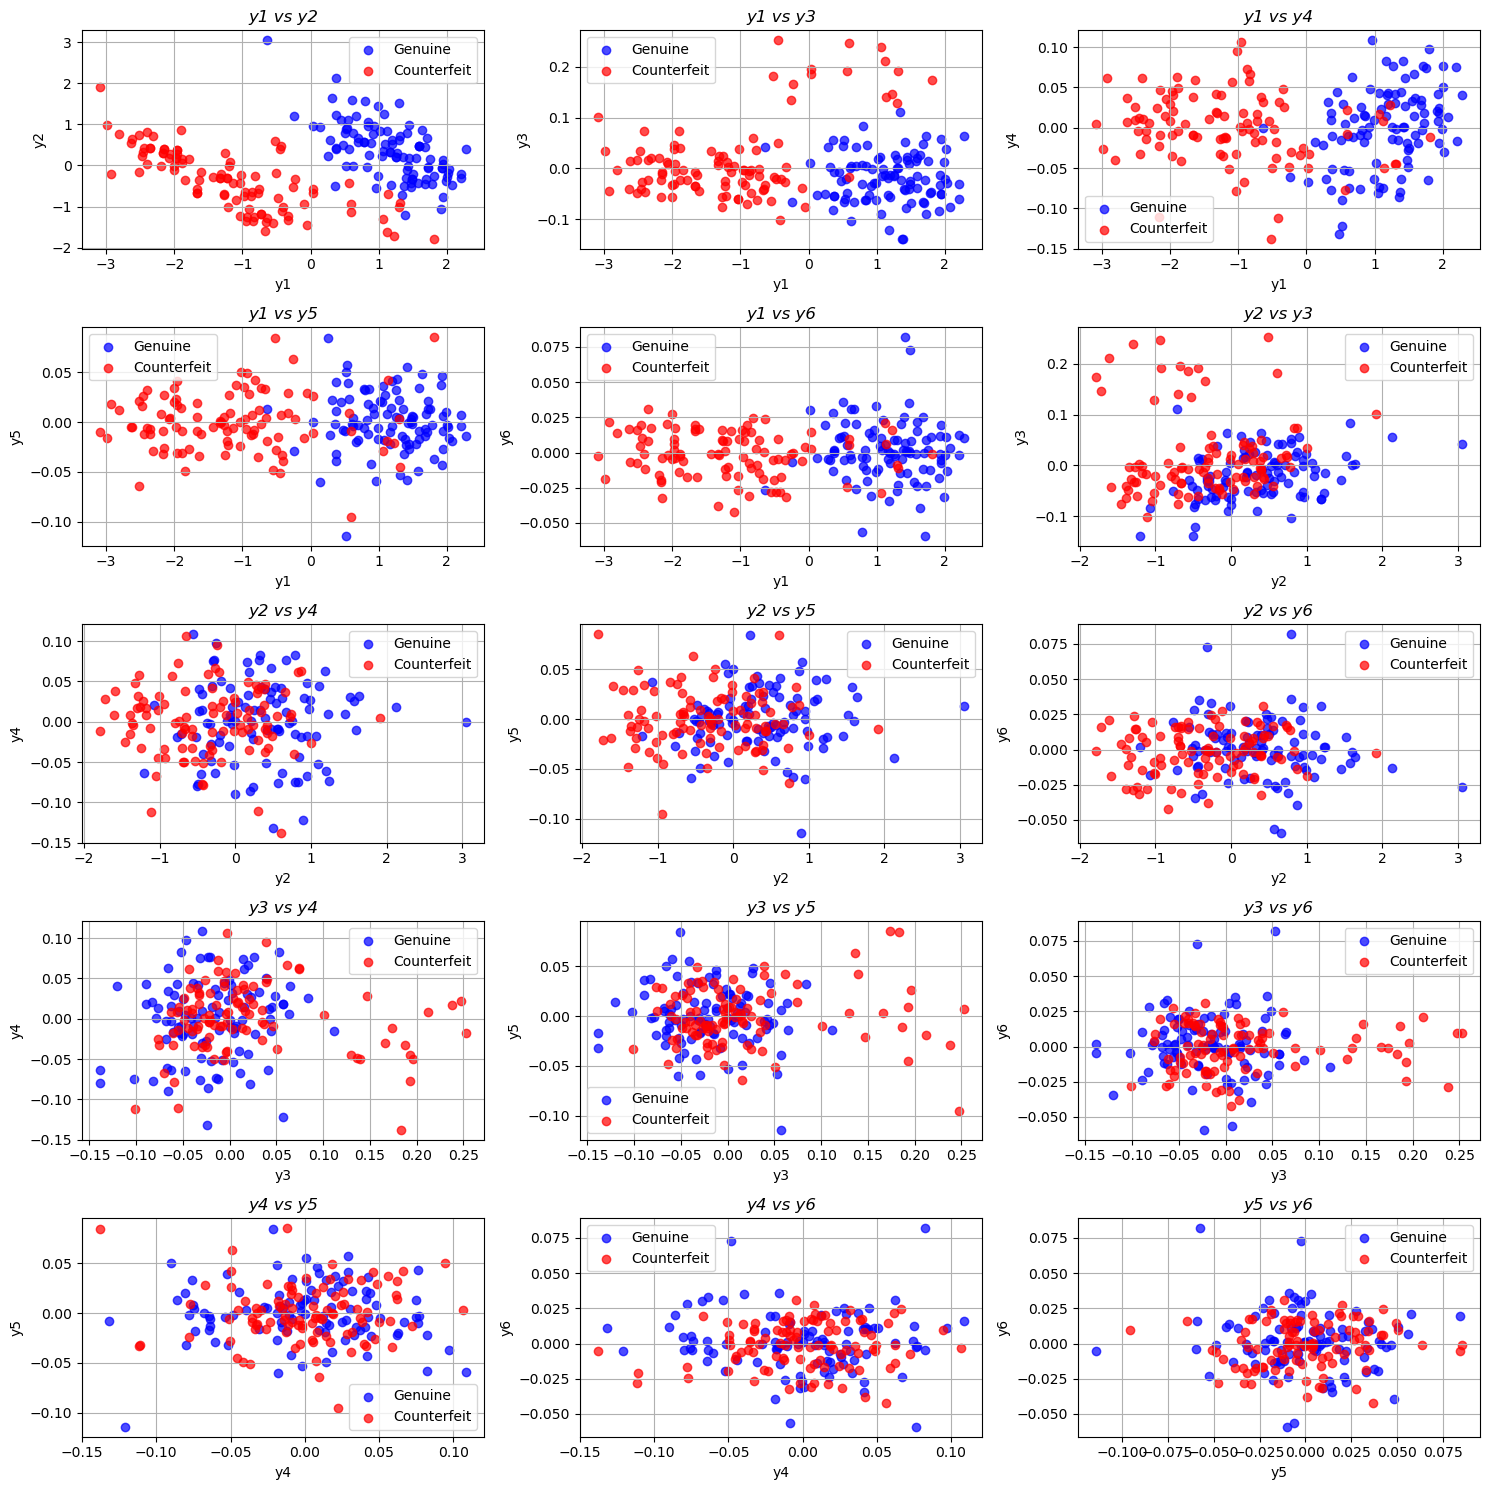

In [84]:
# Plot the scatter plots
plot_scatters(Y)

<br>

**Interpretation of Changes**:

- The variance of $Y_1$, which represents the first principal component, has decreased in the centimeter approach. This is consistent with the scaling effect of converting measurements. However, $Y_1$ still captures the majority of the variance, with subsequent components contributing far less variance, indicating it is still the most important principal component for distinguishing between genuine and counterfeit banknotes.
- The product of the variances and the determinant of the covariance matrix being almost 0.0 indicates that the data, after being transformed and projected onto the new PCA space, lies in a lower-dimensional subspace.
- The scatter plots continue to show strong separation in combinations involving $Y_1$ (e.g., $Y_1$ vs $Y_2$), although the spread of the data is now smaller due to the change in units.



The conversion to centimeters has not significantly altered the separation between the two classes in the scatter plots. This suggests that PCA is robust to changes in the units of measurement, as the principal components still capture the same underlying patterns in the data. The first principal component $y_1$ continues to show the most distinct separation, indicating that it is still the most informative dimension for distinguishing between genuine and counterfeit banknotes.

<br>

**(d) Cumulative Variance Explained and Dimensionality Reduction**

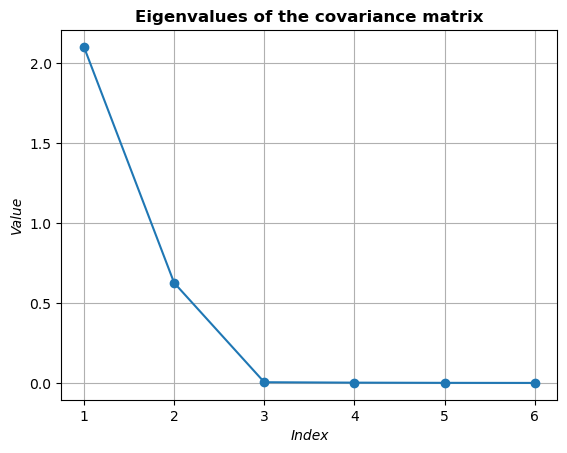


Cumulative sum of the eigenvalues: [0.76814803 0.99708742 0.9987923  0.99955588 0.99987063 1.        ]

Number of eigenvectors selected: 2

Eigenvalues selected:
 [2.10125862 0.62626064]

Eigenvectors selected:
 [[ 0.00497046  0.00107751]
 [-0.01076604 -0.01279284]
 [-0.0141202  -0.01549116]
 [-0.99201366  0.11721303]
 [-0.11341454 -0.99052089]
 [ 0.05201975  0.06873623]]


In [85]:
# Plot eigenvalues
plt.plot(range(1,7), eigenvalues, marker='o')
plt.title('Eigenvalues of the covariance matrix', fontweight='bold')
plt.xlabel('Index', fontstyle='italic')
plt.ylabel('Value', fontstyle='italic')
plt.grid()
plt.show()

# Calculate the cumulative sum of the eigenvalues
cumulative_sum = np.cumsum(eigenvalues)
cumulative_sum /= cumulative_sum[-1]  # Normalize to get the cumulative proportion of explained variance

# Print the cumulative sum of eigenvalues
print('\nCumulative sum of the eigenvalues:', cumulative_sum)

# Select the number of components needed to explain 80% of the variance
k = np.argmax(cumulative_sum >= 0.8) + 1
print('\nNumber of eigenvectors selected:', k)

# Select the top eigenvalues and corresponding eigenvectors
eigenvalues_selected, eigenvectors_selected = eigenvalues[:k], eigenvectors[:, :k]

# Display the selected eigenvalues and eigenvectors
print('\nEigenvalues selected:\n', eigenvalues_selected)
print('\nEigenvectors selected:\n', eigenvectors_selected)

<br>

**Interpretation of Changes**

- In the centimeter-scaled data, the first two principal components now explain **99.71%** of the variance compared to **87.57%** in the millimeter-scaled data. This substantial increase means that a greater proportion of the data's variance is captured by the first two components when using centimeters. This is due to the fact that the variance across the first two components is now more concentrated.
  
- The eigenvectors, while numerically different due to the rescaling, still point to the same patterns in the data. The relationships between the different features remain consistent, showing that the first two components are still the most important for distinguishing between genuine and counterfeit banknotes.

- The differentiation between genuine and counterfeit banknotes is still highly dependent on the first two principal components, as they capture nearly all the variance in the data (99.71%). This suggests that the core differences between the two types of banknotes—likely in measurements such as length and height—are captured well by these components, regardless of whether the data is scaled in millimeters or centimeters.
  
- The increase in variance explained by the first principal component in the centimeter dataset suggests that the dimensionality reduction is now even more effective. The contribution of the first principal component is now even more dominant, likely because the units of $X_1, X_2, X_3,$ and $X_6$ (the converted variables) now scale differently compared to $X_4$ and $X_5$ (which remained in millimeters).

<br><p><h4> <b>Section 3: Normalized PCA</b> </h4></p>

**(a) Explanation of Standardized Data**

In PCA, it is common to standardize the data to ensure that each variable contributes equally to the analysis. Standardization transforms the variables to have zero mean and unit variance, making the covariance matrix equivalent to the correlation matrix.

The standardized data $X_e$ is given by:

$$X_e = H X D^{-1/2}$$

Where:
- $X$ is the original data matrix.
- $H$ is the centering matrix, ensuring that the mean of the standardized data is zero.
- $D$ is a diagonal matrix where each element on the diagonal is the variance (or the standard deviation squared) of each original variable:
  $$D = \text{diag}(\sigma_{11}, \sigma_{22}, \dots, \sigma_{pp})$$
- $D^{-1/2}$ is the inverse square root of this diagonal matrix, used to scale the data by the standard deviation of each feature. The reason for using $D^{-1/2}$ is to normalize each feature, converting variances to 1 (unit variance).


Note that this is the matrix form of the general formula for standarization, which is the following:
$$z = \frac{x - \mu}{\sigma}$$

Since:
- Centering the data is equivalent to subtracting the mean from each column, which is done by multiplying $X$ by the centering matrix $H$.
- Dividing by the standard deviation is done by multiplying the centered data by $D^{-1/2}$, where $D$ contains the variances along the diagonal. Taking the inverse square root of each variance is the same as dividing by the standard deviation.

This formula standardizes each variable (column) by subtracting the mean and dividing by the standard deviation. The result is a new matrix $Z$ where each feature has mean 0 and standard deviation 1.

<br>

**Explanation**

Standardizing the data to have zero mean and unit variance ensures that all features contribute equally to the analysis, regardless of their original scales. This is especially important in PCA, where variables with larger variances can dominate the principal components if not standardized.

The operation $D^{-1/2}$ is applied to scale the variables, ensuring they all have equal variance (i.e., unit variance), making the covariance matrix equivalent to the correlation matrix, as we will see in part **(b)**.


In [86]:
# Step 1: Center the data (H)
n = X.shape[0]
one_n = np.ones((n, 1))
H = np.eye(n) - 1/n * one_n @ one_n.T

# Step 2: Compute the variance matrix D
variances = np.var(X, axis=0) # Variance for each feature (column)
D = np.diag(variances)

# Step 3: Compute D^{-1/2} (inverse square root of variances)
D_inv_sqrt = np.diag(1 / np.sqrt(variances))

# Step 4: Compute the standardized data X_e
X_e = H @ X @ D_inv_sqrt

# Display the results
print("First 10 Standardized Data (X_e):\n", X_e[:10]) # Shape is (200, 6)
print("\nMean of the Standardized Data:", abs(1/n * one_n.T @ X_e))
print("\nVariance of the Standardized Data:", np.var(X_e, axis=0))

First 10 Standardized Data (X_e):
 [[-0.25558323  2.43945206  2.83704322 -0.28973195 -1.18673534  0.44937213]
 [-0.78804829 -1.17043716 -0.63638092 -0.91430383 -1.43644293  1.05839535]
 [-0.25558323 -1.17043716 -0.63638092 -0.49792258 -1.31158914  1.49341194]
 [-0.25558323 -1.17043716 -0.88448265 -1.33068508 -0.31275876  1.3194053 ]
 [ 0.27688183 -1.44812094 -0.63638092  0.6818243  -3.68381128  1.14539867]
 [ 2.14050953  1.88408449  1.34843287 -0.28973195 -0.68732015  0.7973854 ]
 [ 1.60804448 -1.72580473 -0.63638092 -1.05309758 -1.31158914  0.97139204]
 [-1.05428082 -1.44812094 -1.87688955 -1.5388757   0.06180263  1.05839535]
 [ 0.0106493  -2.00348852 -0.63638092 -0.84490695  0.43636402  1.23240199]
 [ 0.80934689  0.77334934  0.85222942 -0.1509382  -0.81217395  0.18836218]]

Mean of the Standardized Data: [[0. 0. 0. 0. 0. 0.]]

Variance of the Standardized Data: [1. 1. 1. 1. 1. 1.]


<br>

**Interpretation**

- The matrix formula $X_e = H X D^{-1/2}$ is the matrix equivalent of standardizing each feature in the dataset. It ensures that each feature has zero mean and unit variance, which is critical for performing PCA when the variables are measured on different scales.
- In practical terms, this standardization removes the influence of different units of measurement (such as millimeters vs centimeters) from the PCA, ensuring that all variables contribute equally to the analysis.

<br>

**(b) Mean and Correlation Matrix of Standardized Data**

Once the data has been standardized using the formula from part **(a)**, we can make two important observations:

1. **Mean of Standardized Data** $\bar{X}_e = 0$:
   After centering the data using the centering matrix $H$, the mean of each feature is zero. This is a property of the centering matrix $H$, which is defined as:

   $$H = I - \frac{1}{n} \mathbf{1}_n \mathbf{1}_n^T$$

   The effect of this matrix is to subtract the mean from each feature in the data.

2. **Covariance Matrix of Standardized Data** $S_e = R$:
   The covariance matrix of the standardized data $X_e$ is the correlation matrix $R$. This occurs because the standardization process converts the original covariance matrix $S$ into the correlation matrix by scaling each feature to have unit variance.

   $$S_e = \frac{1}{n} X_e^T X_e = R$$

   Where $R$ is the correlation matrix, which contains the pairwise correlations between the standardized features. The correlation matrix $R$ has 1s along the diagonal, representing the fact that each feature has unit variance after standardization.

      - *Proving the Covariance Matrix of Standardized Data is the Correlation Matrix:*

         The covariance matrix of the standardized data $X_e$ is given by:

         $$S_e = \frac{1}{n} X_e^T X_e$$

         Since $X_e = H X D^{-1/2}$, we substitute this into the formula for the covariance matrix:

         $$S_e = \frac{1}{n} (H X D^{-1/2})^T (H X D^{-1/2})$$

         Expanding this expression:

         $$S_e = \frac{1}{n} D^{-1/2} X^T H^T H X D^{-1/2}$$

         Recall that $H$ is symmetric $H = H^T$ and $H H = H$, so this simplifies to:

         $$S_e = \frac{1}{n} D^{-1/2} X^T H X D^{-1/2}$$

         Now, recognize that $\frac{1}{n} X^T H X$ is the covariance matrix $S$ of the original data $X$:

         $$S = \frac{1}{n} X^T H X$$

         Substituting this into the equation for $S_e$:

         $$S_e = D^{-1/2} S D^{-1/2}$$

         This expression shows that the covariance matrix $S_e$ of the standardized data is obtained by scaling the covariance matrix $S$ of the original data by the inverse square roots of the variances (i.e., by dividing by the standard deviations). This operation transforms the covariance matrix $S$ into the correlation matrix $R$, because the correlation matrix is defined as:

         $$R = D^{-1/2} S D^{-1/2}$$

         Thus, we have shown that the covariance matrix of the standardized data is the correlation matrix:

         $$S_e = R$$

<br>

**Explanation**

By standardizing the data, we ensure that the mean of the standardized data is zero and that the covariance matrix is equivalent to the correlation matrix. This allows us to focus on the relationships between the variables, free from the effects of differing scales or units of measurement.

In [87]:
# Mean and covariance of the standardized data
x_e_bar = 1/n * one_n.T @ X_e
S_e = 1/n * X_e.T @ H @ X_e
print(f"Mean of Standardized Data:\n {abs(x_e_bar)}")
print(f"\nCovariance Matrix of Standardized Data:\n {S_e}") 

# Correlation matrix of the standardized data
R = D_inv_sqrt @ S @ D_inv_sqrt # Shapes are (6, 6) @ (6, 6) @ (6, 6) = (6, 6)
print(f"\nCorrelation Matrix of Standardized Data:\n {R}")

Mean of Standardized Data:
 [[0. 0. 0. 0. 0. 0.]]

Covariance Matrix of Standardized Data:
 [[ 1.          0.23129257  0.1517628  -0.18980092 -0.06132141  0.19430146]
 [ 0.23129257  1.          0.74326277  0.41378098  0.3623496  -0.50322905]
 [ 0.1517628   0.74326277  1.          0.48675765  0.40067021 -0.51647554]
 [-0.18980092  0.41378098  0.48675765  1.          0.14185134 -0.6229827 ]
 [-0.06132141  0.3623496   0.40067021  0.14185134  1.         -0.59404464]
 [ 0.19430146 -0.50322905 -0.51647554 -0.6229827  -0.59404464  1.        ]]

Correlation Matrix of Standardized Data:
 [[ 1.          0.23129257  0.1517628  -0.18980092 -0.06132141  0.19430146]
 [ 0.23129257  1.          0.74326277  0.41378098  0.3623496  -0.50322905]
 [ 0.1517628   0.74326277  1.          0.48675765  0.40067021 -0.51647554]
 [-0.18980092  0.41378098  0.48675765  1.          0.14185134 -0.6229827 ]
 [-0.06132141  0.3623496   0.40067021  0.14185134  1.         -0.59404464]
 [ 0.19430146 -0.50322905 -0.51647554 -

<br>

**Interpretation**

- The covariance matrix of the standardized data is transformed into the correlation matrix. The correlation matrix helps to identify the pairwise relationships between the features of the banknotes, showing how strongly the attributes are related to each other in a standardized space. This step ensures that any differences in the units of measurements (e.g., millimeters versus centimeters) are normalized, allowing us to focus solely on the relationships between the features. For example, this could reveal how the length of the banknote relates to its height, regardless of their original units.

<br>

**(c) PCA with Standardized Data (NPC)**

In this part of the analysis, we will replicate the PCA procedure using standardized data. This ensures that all features have unit variance and are comparable, avoiding any dominance of features with larger values or scales. The steps include calculating the covariance matrix, eigenvalues, eigenvectors, and projecting the data onto the principal components.

<br>

- **(a) Calculation of the Mean and Covariance Matrix for Standardized Data**

This results were previously calculated and discussed in exercise 3.a) and 3.b). Therefore, we will proceed with the next exercise.

<br>

- **(b) Eigenvalue and Eigenvector Calculation for Standardized Data**


In [88]:
# Compute the eigenvalues and eigenvectors of the covariance matrix
eigenvalues_e, eigenvectors_e = np.linalg.eig(S_e)

# Display the eigenvalues and eigenvectors
print('Eigenvalues:\n', np.diag(eigenvalues_e))
print('\nEigenvectors:\n', eigenvectors_e)
print('\nVerification of S = ΓΛΓ^T:\n', eigenvectors_e @ np.diag(eigenvalues_e) @ eigenvectors_e.T)

Eigenvalues:
 [[2.9455582  0.         0.         0.         0.         0.        ]
 [0.         1.27808378 0.         0.         0.         0.        ]
 [0.         0.         0.86903255 0.         0.         0.        ]
 [0.         0.         0.         0.44976868 0.         0.        ]
 [0.         0.         0.         0.         0.2686769  0.        ]
 [0.         0.         0.         0.         0.         0.18887988]]

Eigenvectors:
 [[ 0.00698703  0.81549497  0.01768066 -0.57461728  0.0587961  -0.03105698]
 [-0.46775816  0.34196711 -0.10338286  0.39492254 -0.63949612  0.29774768]
 [-0.4866787   0.2524586  -0.12347472  0.43027826  0.61409716 -0.34915294]
 [-0.40675833 -0.26622878 -0.58353831 -0.40367354  0.21547564  0.46235361]
 [-0.36789112 -0.09148667  0.78757147 -0.11022672  0.21984942  0.41896754]
 [ 0.49345832  0.27394074 -0.11387536  0.39193052  0.3401601   0.63179849]]

Verification of S = ΓΛΓ^T:
 [[ 1.          0.23129257  0.1517628  -0.18980092 -0.06132141  0.19430146]


<br>

**Interpretation**

- In this case, after standardizing the data, we observe that the first principal component (with eigenvalue ~2.95) still explains the most variance in the dataset, but the variance explained by each subsequent component has shifted slightly compared to the original unstandardized version. This is expected since standardization ensures that all features have equal weight by removing the units of measurement.

- The effect of standardizing the data is evident in the spread of variance across the eigenvectors. Unlike the unstandardized version, where the first component dominated, standardization results in a more balanced distribution of variance among the principal components. This could indicate that some features with larger original scales were overemphasized in the unstandardized PCA.

- The eigenvectors provide the directions of the principal components in the standardized data space. These directions now reflect the correlations among variables, as the data has been normalized to unit variance.

<br><br>

- **(c) Principal Component Scores and Scatter Plots for Standardized Data**

In [89]:
# Project the standardized data onto the eigenvectors of the standardized covariance matrix
Y_e = X_e @ eigenvectors_e

# S_y = 1/n * Y.T @ H @ Y is the covariance matrix of Y_e
S_y_e = 1/n * Y_e.T @ H @ Y_e

# 1. Y_e is distributed multinormally with E[y] = 0, covariance = 0 and variance = eigenvalues_e
print('Mean of Y_e:', list(map(lambda x: abs(round(x, 12)), np.mean(Y_e, axis=0))))
print('\nVariance of Y_e:', np.var(Y_e, axis=0))

# 2. The variance of Y_e is the diagonal of the covariance matrix of Y_e, that is, the eigenvalues_e.
print('\nCovariance matrix of Y_e:\n', np.round(S_y_e, 5))
print('\nEigenvalues_e:\n', np.round(np.diag(eigenvalues_e), 5))

# 3. The product of the variances is equal to the determinant of the covariance matrix of Y_e, that is, the product of the eigenvalues_e.
print('\nProduct of the variances:', round(np.prod(np.var(Y_e, axis=0)), 5))
print('\nDeterminant of the covariance matrix of Y_e:', round(np.linalg.det(S_y_e), 5), '\n')

Mean of Y_e: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

Variance of Y_e: [2.9455582  1.27808378 0.86903255 0.44976868 0.2686769  0.18887988]

Covariance matrix of Y_e:
 [[ 2.94556 -0.      -0.       0.      -0.      -0.     ]
 [-0.       1.27808  0.      -0.       0.      -0.     ]
 [-0.       0.       0.86903 -0.       0.       0.     ]
 [ 0.      -0.      -0.       0.44977  0.      -0.     ]
 [-0.       0.       0.       0.       0.26868  0.     ]
 [-0.      -0.       0.      -0.       0.       0.18888]]

Eigenvalues_e:
 [[2.94556 0.      0.      0.      0.      0.     ]
 [0.      1.27808 0.      0.      0.      0.     ]
 [0.      0.      0.86903 0.      0.      0.     ]
 [0.      0.      0.      0.44977 0.      0.     ]
 [0.      0.      0.      0.      0.26868 0.     ]
 [0.      0.      0.      0.      0.      0.18888]]

Product of the variances: 0.07467

Determinant of the covariance matrix of Y_e: 0.07467 



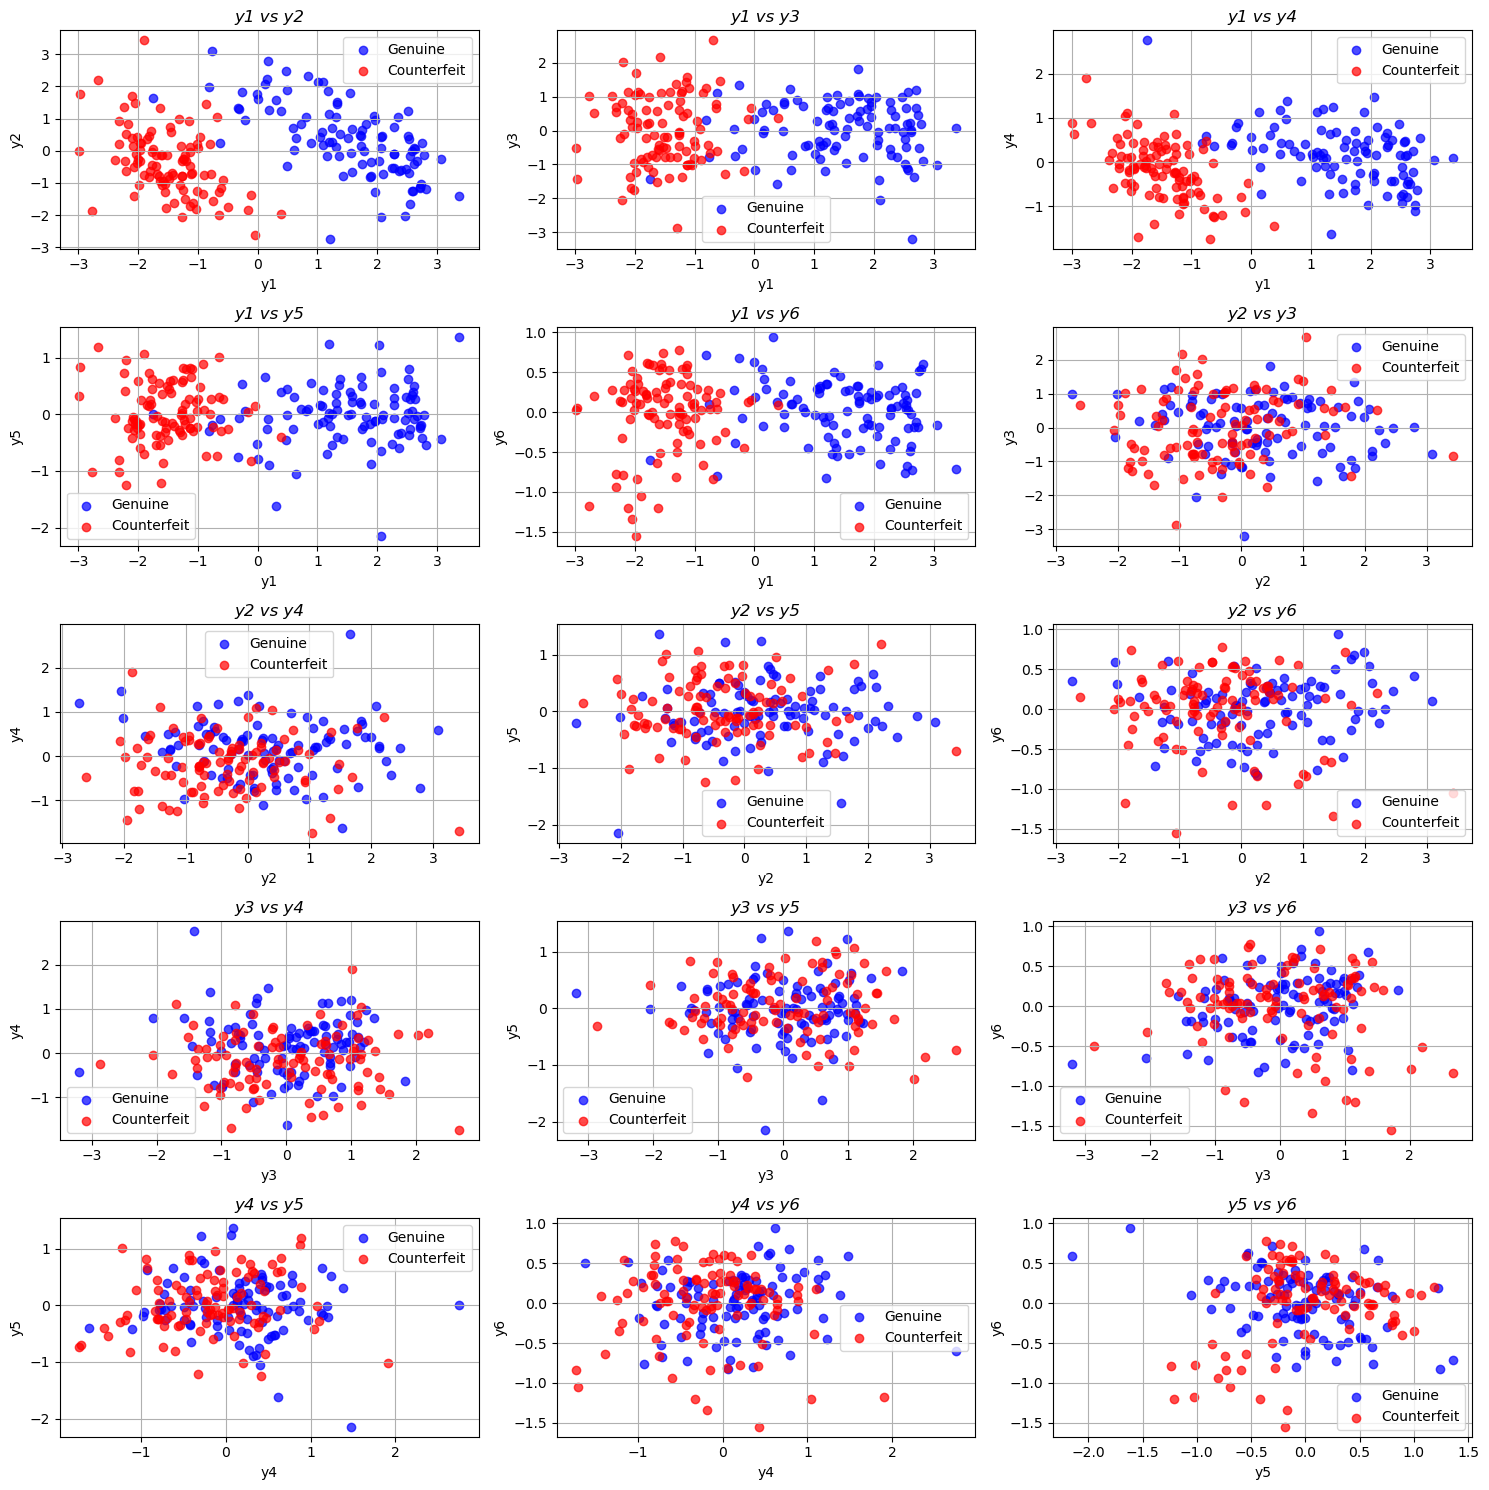

In [90]:
# Plot the scatter plots
plot_scatters(Y_e)

<br>

**Interpretation**

- The scatter plots with standardized principal components again show a clear separation between genuine and counterfeit banknotes. However, the distribution appears more balanced, and the separation is not as dominated by the first principal component, as was the case in the unstandardized PCA.

- Standardization has ensured that each variable contributes equally to the PCA analysis. This can be seen in how the variance is distributed more evenly across multiple components, whereas previously, the first component dominated. 

- Scatter plots involving $y1$ (the first principal component) still show a more distinct separation between genuine and counterfeit notes, but now there is also valuable information in components $y2$ and $y3$, which were previously overshadowed by the scale of the measurements. This implies that standardization has allowed for a more balanced and equitable contribution from each of the original features.

In terms of distinguishing banknotes, the standardized approach provides a more balanced insight into which features differentiate genuine and counterfeit notes. The distinction is still present, but now multiple components provide useful information, which was not as evident before standardization.

<br><br>

- **(d) Cumulative Variance Explained for Standardized Data**

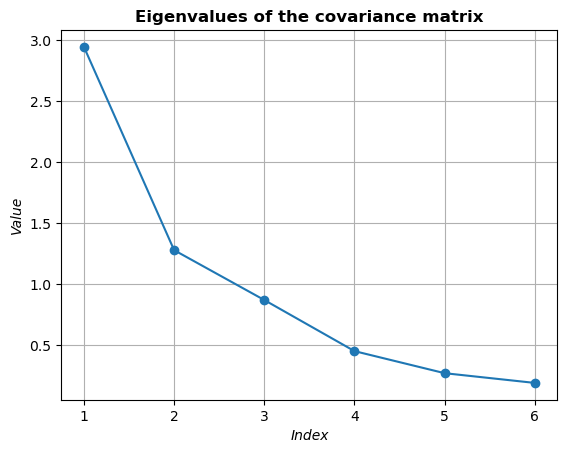


Cumulative sum of the eigenvalues_e: [0.49092637 0.70394033 0.84877909 0.92374054 0.96852002 1.        ]

Number of eigenvectors selected: 3

Eigenvalues selected:
 [2.9455582  1.27808378 0.86903255]

Eigenvectors selected:
 [[ 0.00698703  0.81549497  0.01768066]
 [-0.46775816  0.34196711 -0.10338286]
 [-0.4866787   0.2524586  -0.12347472]
 [-0.40675833 -0.26622878 -0.58353831]
 [-0.36789112 -0.09148667  0.78757147]
 [ 0.49345832  0.27394074 -0.11387536]]


In [91]:
# Plot eigenvalues_e
plt.plot(range(1,7), eigenvalues_e, marker='o')
plt.title('Eigenvalues of the covariance matrix', fontweight='bold')
plt.xlabel('Index', fontstyle='italic')
plt.ylabel('Value', fontstyle='italic')
plt.grid()
plt.show()

# Calculate the cumulative sum of the eigenvalues_e
cumulative_sum = np.cumsum(eigenvalues_e)
cumulative_sum /= cumulative_sum[-1]  # Normalize to get the cumulative proportion of explained variance

# Print the cumulative sum of eigenvalues_e
print('\nCumulative sum of the eigenvalues_e:', cumulative_sum)

# Select the number of components needed to explain 80% of the variance
k = np.argmax(cumulative_sum >= 0.8) + 1
print('\nNumber of eigenvectors selected:', k)

# Select the top eigenvalues_e and corresponding eigenvectors_e
eigenvalues_selected, eigenvectors_selected = eigenvalues_e[:k], eigenvectors_e[:, :k]

# Display the selected eigenvalues_e and eigenvectors_e
print('\nEigenvalues selected:\n', eigenvalues_selected)
print('\nEigenvectors selected:\n', eigenvectors_selected)

<br>

**Interpretation**

- With the standardized data, we observe that the first three principal components are required to explain approximately 84.88% of the variance. This contrasts with the unstandardized data, where only two principal components explained more than 80% of the variance (nearly 1 component when we modified the scales, i.e. ~77%). This change highlights how standardization has distributed the variance more evenly across multiple components.

- The first eigenvalue remains the largest, but the second and third eigenvalues now play a more significant role in explaining the variance in the data. The third component, in particular, contributes substantially to the overall explanation of the variance, whereas in the unstandardized case, its contribution was much smaller (almost zero when we modified the measurement units).

- The increased number of principal components needed to capture a similar amount of variance suggests that standardization has given more balanced weight to all features, especially those that were previously overshadowed by larger measurements, such as the length or diagonal. This shift helps reveal subtler differences between genuine and counterfeit banknotes, regardless of their original units, that may have been hidden before.


<br>

- **(e): Algebraic Proof of Covariance and Correlation in PCA Sheme for Standardized Data**

The algebraic proof remains the same as in *Exercise 1.e)*. This is because the relationship between $\text{cov}(X, Y) = \Gamma \Lambda$ is independent of whether the data is standardized or not. The proof relies on the properties of eigenvectors and eigenvalues in the PCA transformation, which apply universally. Therefore, the steps and conclusions drawn in *Exercise 1.e)** are still valid for the standardized principal components.

<br>

- **(f) Correlation Calculation and Unit Circle Plot for Standardized Data**

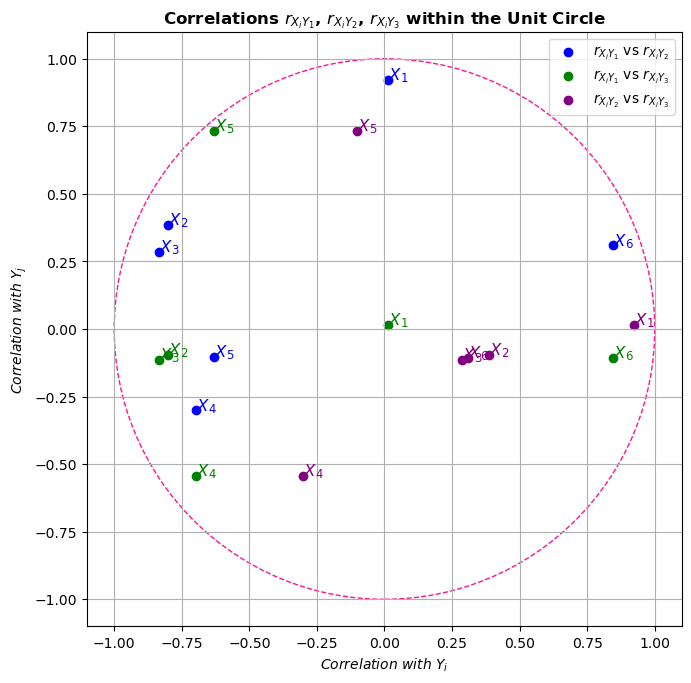

In [92]:
# Plot the correlations
plot_correlations(eigenvectors_e, eigenvalues_e, S_e)

<br>

**Interpretation**

- In this plot, we can observe the correlations between the original features $X_i$ and the standardized principal components $Y_1$, $Y_2$, and $Y_3$ within the unit circle. After standardization, a notable change is that **$X_1$ (Length of the banknote)**, which previously showed the lowest correlation for $Y_2$ vs $Y_1$, now shows the **highest correlation** for this component pairing. This indicates a significant shift in how this feature contributes to the first two principal components after standardization.

- However, for the **$Y_1$ vs $Y_3$** pairing, $X_1$'s correlation is **almost zero**, highlighting a drastic change in its influence compared to the unstandardized data. This suggests that while the ength of the banknote plays a key role in explaining the variance between the first two components, its contribution to the third component is minimal in the standardized space.

- Features such as $X_6$ (Length of the diagonal) and $X_4$ (Distance of the inner frame to the lower border), which previously showed strong correlations with $Y_1$, still exhibit a notable influence but with more balance across the principal components. Similarly, $X_2$ and $X_3$ (left and right heights of the banknote), which were previously less prominent in unstandardized data, now show more significant contributions across the components, particularly for $Y_2$ and $Y_3$.

- This shift in correlations emphasizes the effect of standardization in redistributing the variance across the features. **Standardization has enhanced the relative importance of previously less dominant features**, giving them a more balanced representation in the PCA transformation. This helps in providing a more equitable analysis of the relationships between the variables and how they collectively contribute to distinguishing genuine from counterfeit banknotes.


<br><p><h4> <b>Final Conclusion</b> </h4></p>

This project applied **Principal Component Analysis (PCA)** to the problem of distinguishing between genuine and counterfeit Swiss banknotes. Through multiple stages, we explored both unstandardized and standardized data, observing how different scaling methods affect the interpretation of the data.

In the unstandardized PCA, the first principal component ($Y_1$) dominated the variance, clearly separating genuine and counterfeit banknotes based on key measurements such as length and height. However, this analysis was sensitive to the scales of the features, as larger measurements contributed more to the variance captured in the early components.

After standardizing the data, PCA provided a more balanced view of the contributions from all features. Standardization redistributed the variance more evenly, allowing features that were previously less prominent (such as $X_2$ and $X_3$) to play a more significant role. This transformation helped provide a clearer distinction between the banknotes by minimizing the effect of differing scales.

The correlation analysis within the unit circle revealed insightful shifts. Notably, features such as $X_1$, which were dominant in the unstandardized space, showed different behavior after standardization, highlighting the importance of scaling in PCA when dealing with features of different units or scales.

Ultimately, **PCA proved effective** in capturing the underlying structure of the banknote data, providing valuable insights into the differences between genuine and counterfeit notes. Standardization was essential in ensuring that all features contributed fairly to the analysis, improving the overall interpretability of the results.